In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
!wget -nc https://storage.googleapis.com/github_recommendation/github_stars.csv.gz -O ../data/github_stars.csv.gz

File ‘../data/github_stars.csv.gz’ already there; not retrieving.


In [4]:
github_stars_path = '../data/github_stars.csv.gz'

In [5]:
raw_stars_df = pd.read_csv(github_stars_path)

In [6]:
raw_stars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175473 entries, 0 to 1175472
Data columns (total 2 columns):
user    1175473 non-null object
repo    1175473 non-null object
dtypes: object(2)
memory usage: 17.9+ MB


In [7]:
raw_stars_df.head()

,user,repo
0,arden,rs/xid
1,rockjins,tj/ejs
2,minnaq,tj/ejs
3,aa524,iogf/vy
4,chrishamant,lxn/walk


In [8]:
def remove_users_and_repos_with_not_enough_stars(
        df,
        user_threshold=5,
        repo_threshold=5):
    user_counts = df['user'].value_counts()
    repo_counts = df['repo'].value_counts()
    enough_starred_repos = repo_counts[repo_counts >= repo_threshold]
    enough_starred_users = user_counts[user_counts >= user_threshold]
    return df[df['repo'].isin(enough_starred_repos.index) & df['user'].isin(enough_starred_users.index)]

In [9]:
stars_df = remove_users_and_repos_with_not_enough_stars(raw_stars_df)

In [10]:
stars_df = remove_users_and_repos_with_not_enough_stars(raw_stars_df)
for i in range(10):
    tmp_stars_df = stars_df
    stars_df = remove_users_and_repos_with_not_enough_stars(tmp_stars_df)

In [11]:
len(raw_stars_df)

1175473

# Number of filtered out rows

In [12]:
print(len(stars_df))

1130743


# Star counts

# Counts truncated by 0.99 quantile

In [15]:
def print_star_counts_by_col(stars_df, col):
    counts = stars_df[col].value_counts()
    
    q = counts.quantile(0.99)
    sns.distplot(np.minimum(counts, q), kde=False)
    plt.title('{} star counts'.format(col))
    plt.show()

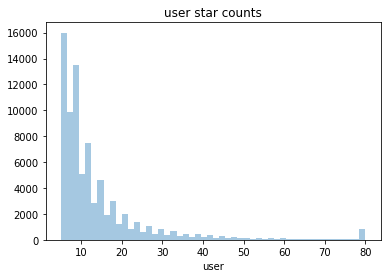

In [16]:
print_star_counts_by_col(stars_df, 'user')

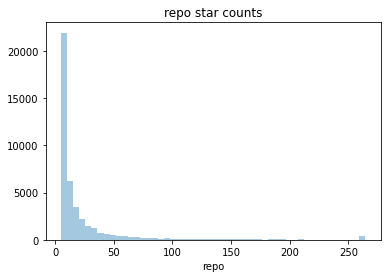

In [17]:
print_star_counts_by_col(stars_df, 'repo')

# Filter users/repos with less than 10 stars

In [18]:
stars_df = remove_users_and_repos_with_not_enough_stars(raw_stars_df)
for i in range(10):
    tmp_stars_df = stars_df
    stars_df = remove_users_and_repos_with_not_enough_stars(tmp_stars_df, 10, 10)

In [19]:
print(len(stars_df))

628326


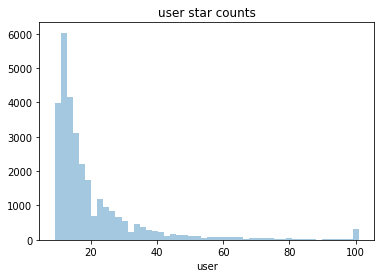

In [20]:
print_star_counts_by_col(stars_df, 'user')

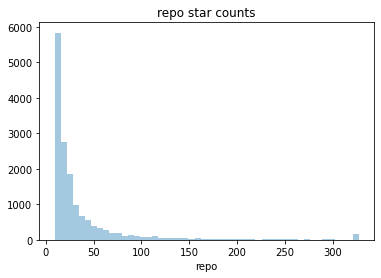

In [21]:
print_star_counts_by_col(stars_df, 'repo')